In [1]:
import pandas as pd
data=pd.read_csv(r"C:\Users\HP\Desktop\Datasets\weather_data.csv")
data

,Outlook,Temperature,Humidity,Wind,Play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Cool,Normal,Weak,Yes
4,Rain,Cool,Normal,Strong,No
5,Sunny,Mild,High,Weak,No
6,Sunny,Cool,Normal,Weak,Yes
7,Rain,Mild,Normal,Weak,Yes
8,Sunny,Mild,Normal,Strong,Yes
9,Overcast,Mild,High,Strong,Yes


In [2]:
#As our ml model do not understand string so we use label encoder
from sklearn.preprocessing import LabelEncoder
Outlook=LabelEncoder()
Temperature=LabelEncoder()
Humidity=LabelEncoder()
Wind=LabelEncoder()
Play=LabelEncoder()
data['Outlook']=Outlook.fit_transform(data['Outlook'])
data['Temperature']=Temperature.fit_transform(data['Temperature'])
data['Humidity']=Humidity.fit_transform(data['Humidity'])
data['Wind']=Wind.fit_transform(data['Wind'])
data['Play']=Play.fit_transform(data['Play'])

In [3]:
data

,Outlook,Temperature,Humidity,Wind,Play
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,0,1,1,1
4,1,0,1,0,0
5,2,2,0,1,0
6,2,0,1,1,1
7,1,2,1,1,1
8,2,2,1,0,1
9,0,2,0,0,1


In [4]:
input=['Outlook','Temperature','Humidity','Wind']
x=data[input]
y=data.Play
x

,Outlook,Temperature,Humidity,Wind
0,2,1,0,1
1,2,1,0,0
2,0,1,0,1
3,1,0,1,1
4,1,0,1,0
5,2,2,0,1
6,2,0,1,1
7,1,2,1,1
8,2,2,1,0
9,0,2,0,0


In [5]:
y

0     0
1     0
2     1
3     1
4     0
5     0
6     1
7     1
8     1
9     1
10    1
11    0
12    1
13    1
Name: Play, dtype: int32

In [6]:
#training the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [7]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='gini')
classifier.fit(x_train,y_train)

DecisionTreeClassifier()

In [8]:
classifier.predict(x_test)

array([0, 1, 0])

In [9]:
x_test

,Outlook,Temperature,Humidity,Wind
12,0,0,1,0
2,0,1,0,1
13,1,2,0,1


In [10]:
classifier.score(x_test,y_test)

0.3333333333333333

[Text(167.4, 190.26, 'X[2] <= 0.5\ngini = 0.496\nsamples = 11\nvalue = [5, 6]'),
 Text(83.7, 135.9, 'X[0] <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(41.85, 81.53999999999999, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(125.55000000000001, 81.53999999999999, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(251.10000000000002, 135.9, 'X[3] <= 0.5\ngini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(209.25, 81.53999999999999, 'X[1] <= 1.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(167.4, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(251.10000000000002, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(292.95, 81.53999999999999, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]')]

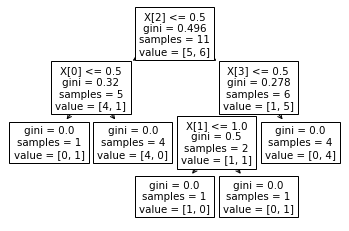

In [11]:
from sklearn import tree
tree.plot_tree(classifier)

[Text(167.4, 190.26, 'X[2] <= 0.5\nentropy = 0.994\nsamples = 11\nvalue = [5, 6]'),
 Text(83.7, 135.9, 'X[0] <= 0.5\nentropy = 0.722\nsamples = 5\nvalue = [4, 1]'),
 Text(41.85, 81.53999999999999, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(125.55000000000001, 81.53999999999999, 'entropy = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(251.10000000000002, 135.9, 'X[3] <= 0.5\nentropy = 0.65\nsamples = 6\nvalue = [1, 5]'),
 Text(209.25, 81.53999999999999, 'X[0] <= 1.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(167.4, 27.180000000000007, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(251.10000000000002, 27.180000000000007, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(292.95, 81.53999999999999, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]')]

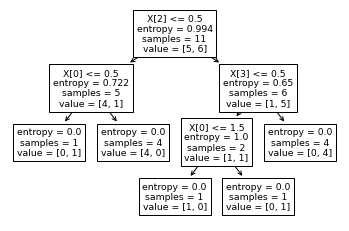

In [14]:
# same for entropy
classifier=DecisionTreeClassifier(criterion='entropy')
classifier.fit(x_train,y_train)
classifier.predict(x_test)
x_test
classifier.score(x_test,y_test)
from sklearn import tree
tree.plot_tree(classifier)